In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Walmart.csv")

In [ ]:
print(data.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [ ]:
missing_values = data.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
    print("No duplicate values found.")
else:
    print("Duplicate values found:")
    print(duplicate_rows)

No duplicate values found.


In [ ]:
average_sales = data['Weekly_Sales'].mean()
print("Average Weekly Sales:", average_sales)

Average Weekly Sales: 1046964.8775617715


In [ ]:
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232

In [ ]:
df = pd.read_csv('/content/Walmart.csv')
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-10-f66e49aae331>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.shape

(6435, 9)

In [ ]:
df['Store'].nunique() # number of different values

45

In [ ]:
df = df.loc[df['Weekly_Sales'] > 0]

In [ ]:
# Extract year information
df['Year'] = df['Date'].dt.year

Total sales for year 2010: 2288886120.41
Total sales for year 2011: 2448200007.35
Total sales for year 2012: 2000132859.35


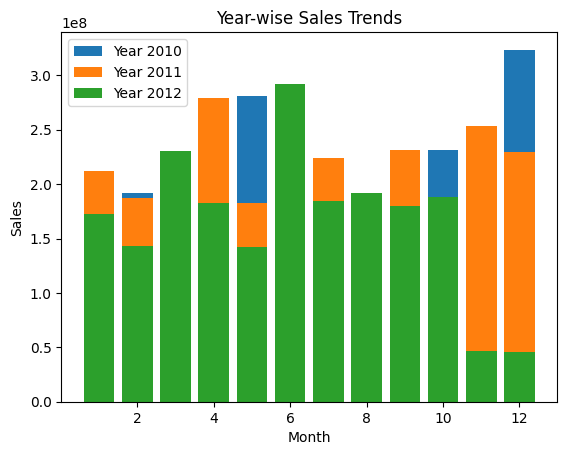

In [ ]:
years = df['Year'].unique()

for year in years:
    # Subset data for the specific year
    year_data = df[df['Year'] == year]

    # Sales trends
    total_sales = year_data['Weekly_Sales'].sum()
    print(f"Total sales for year {year}: {total_sales}")

    # Sales by month
    monthly_sales = year_data.groupby(year_data['Date'].dt.month)['Weekly_Sales'].sum()
    plt.bar(monthly_sales.index, monthly_sales.values, label=f"Year {year}")


plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.title('Year-wise Sales Trends')
plt.show()

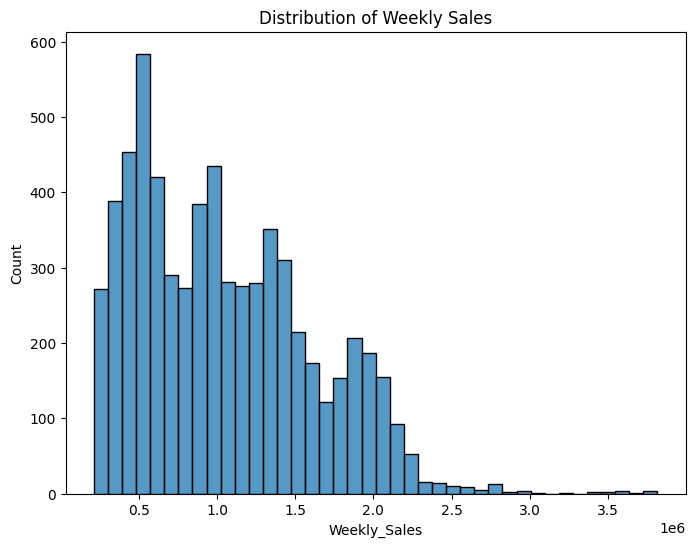

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Weekly_Sales', bins=40)
plt.title('Distribution of Weekly Sales')
plt.show()

<ipython-input-18-2c4efabf73eb>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


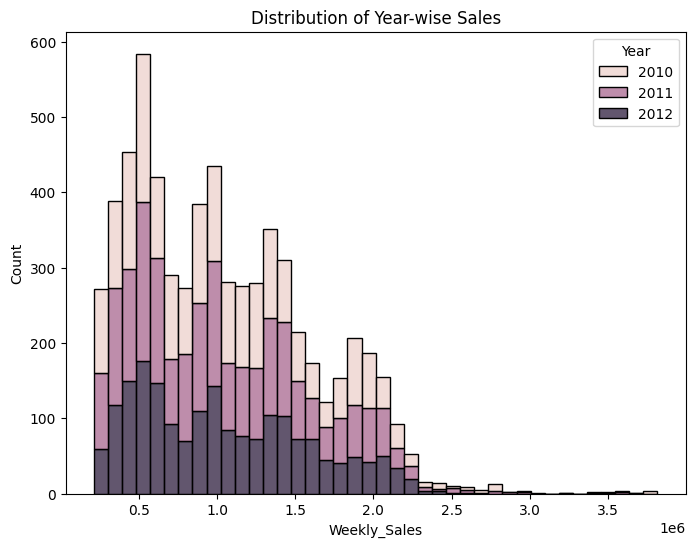

In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year from 'Date' column
data['Year'] = data['Date'].dt.year

# Plot the distribution of year-wise sales
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Weekly_Sales', hue='Year', bins=40, multiple='stack')
plt.title('Distribution of Year-wise Sales')
plt.show()

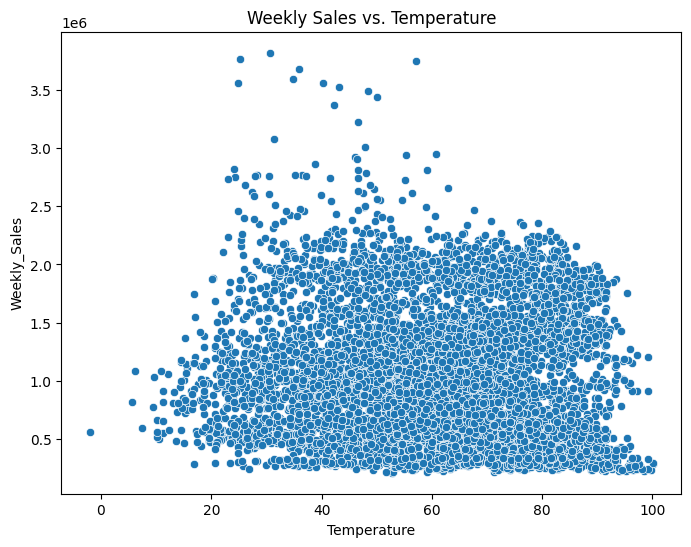

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Temperature', y='Weekly_Sales')
plt.title('Weekly Sales vs. Temperature')
plt.show()

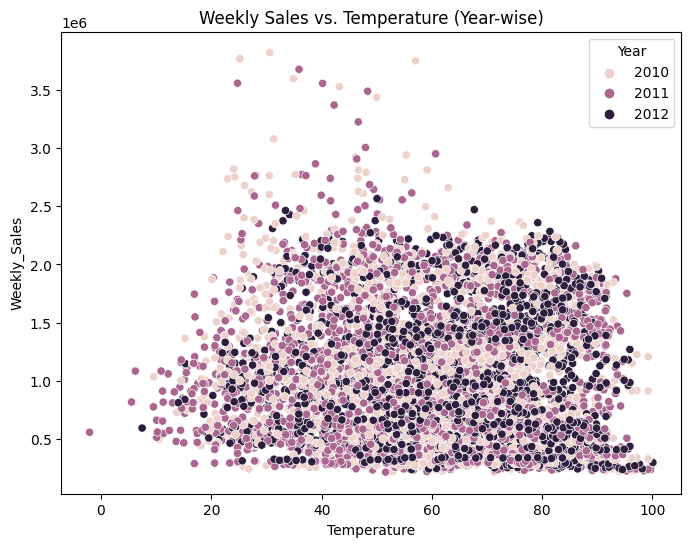

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Temperature', y='Weekly_Sales', hue='Year')
plt.title('Weekly Sales vs. Temperature (Year-wise)')
plt.show()

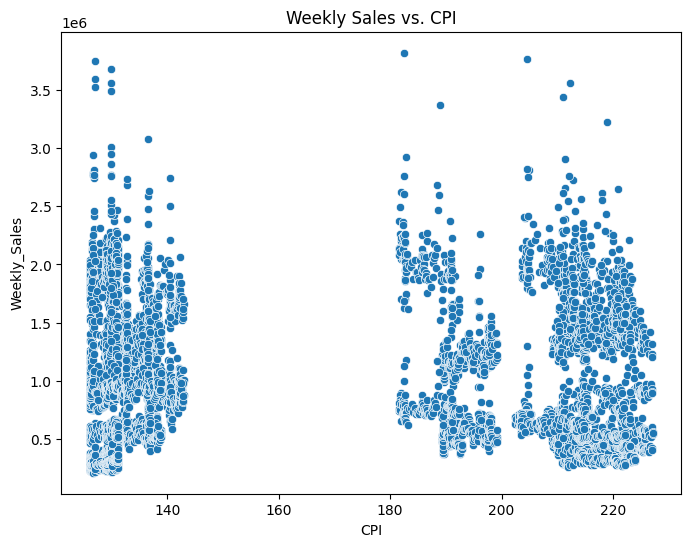

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='CPI', y='Weekly_Sales')
plt.title('Weekly Sales vs. CPI')
plt.show()

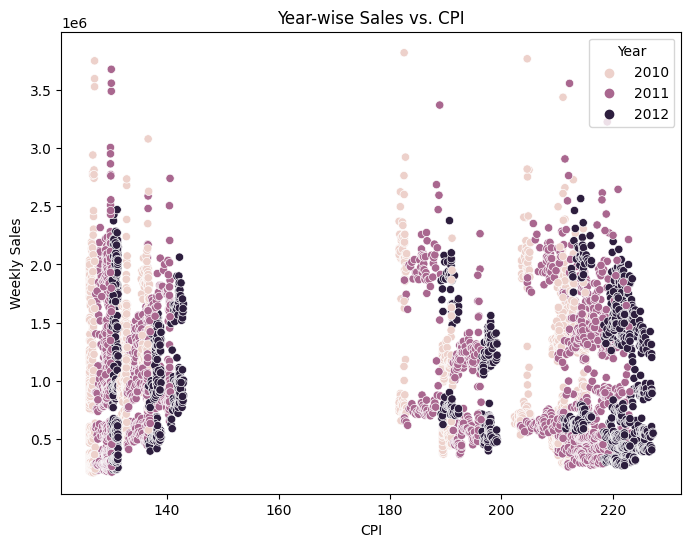

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='CPI', y='Weekly_Sales', hue='Year')
plt.title('Year-wise Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

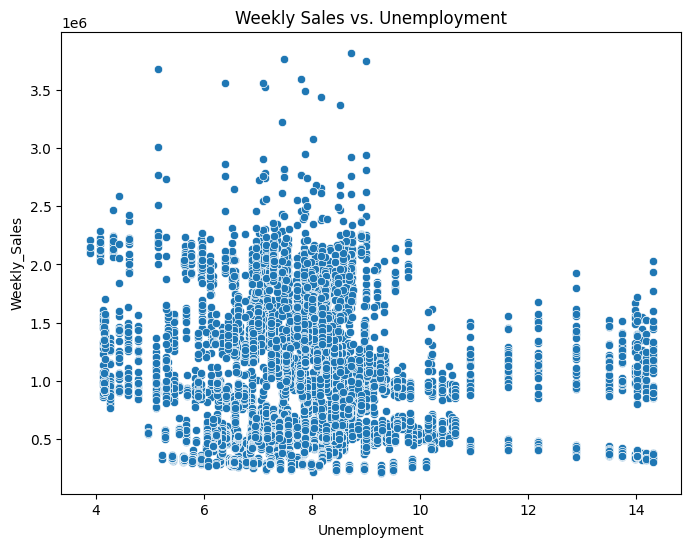

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Unemployment', y='Weekly_Sales')
plt.title('Weekly Sales vs. Unemployment')
plt.show()

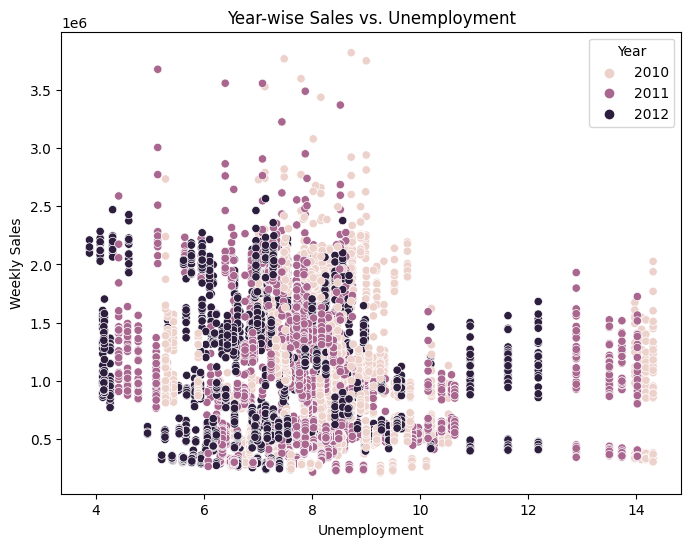

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Unemployment', y='Weekly_Sales', hue='Year')
plt.title('Year-wise Sales vs. Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

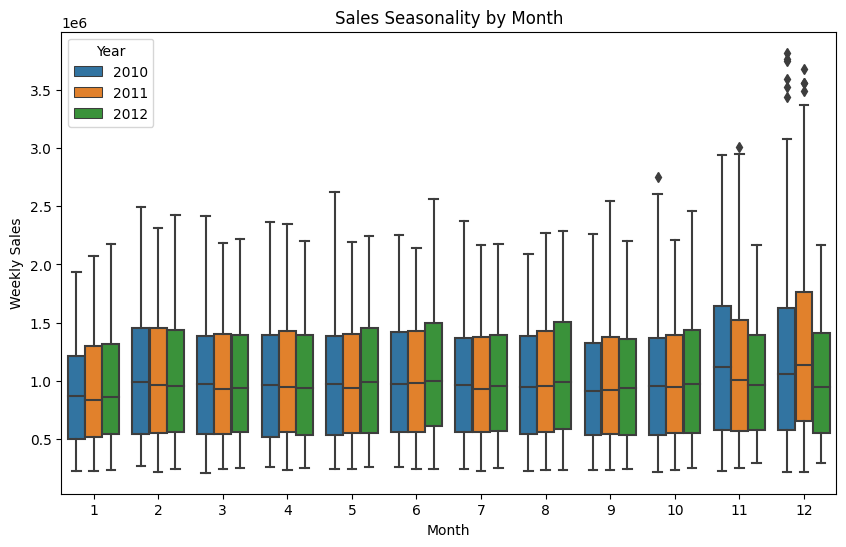

In [ ]:
# Seasonality Analysis:
data['Month'] = data['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Month', y='Weekly_Sales', hue='Year')
plt.title('Sales Seasonality by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

<ipython-input-58-2f4f0928b0d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  correlation = data.groupby('Year').corr()


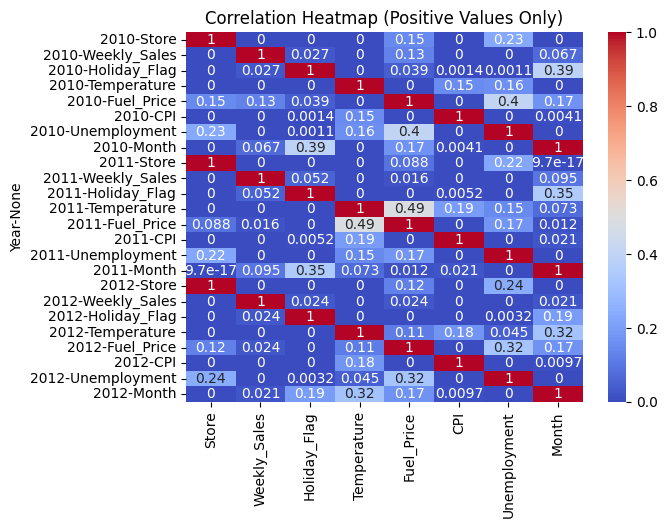

In [ ]:
# Correlation Analysis:
correlation = data.groupby('Year').corr()
correlation_cleaned = correlation.applymap(lambda x: x if x > 0 else 0)
sns.heatmap(correlation_cleaned, annot=True, cmap='coolwarm', vmin=0)
plt.title('Correlation Heatmap (Positive Values Only)')
plt.show()

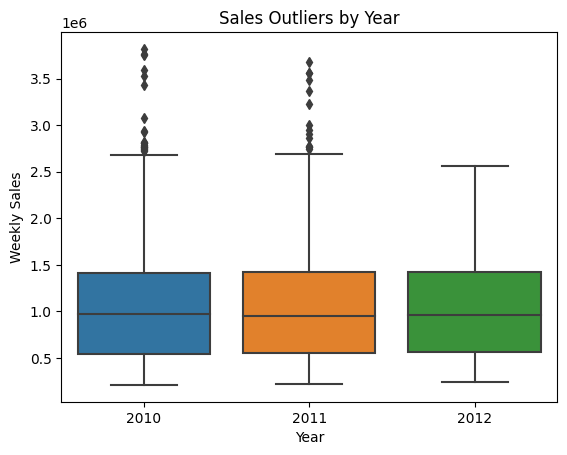

In [ ]:
# Outlier Detection:
sns.boxplot(data=data, x='Year', y='Weekly_Sales')
plt.title('Sales Outliers by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.show()

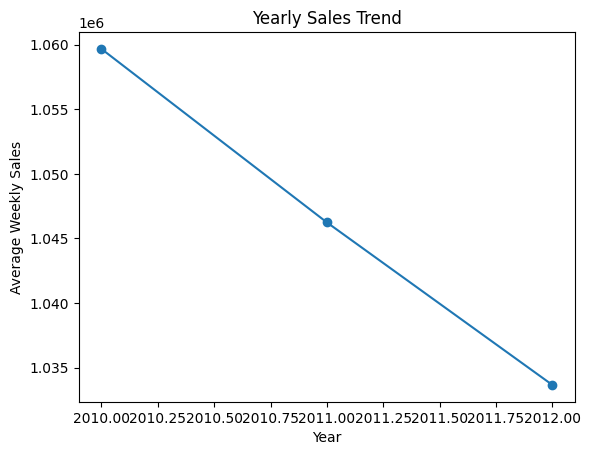

In [ ]:
# Trend Analysis:
yearly_sales = data.groupby('Year')['Weekly_Sales'].mean()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.show()


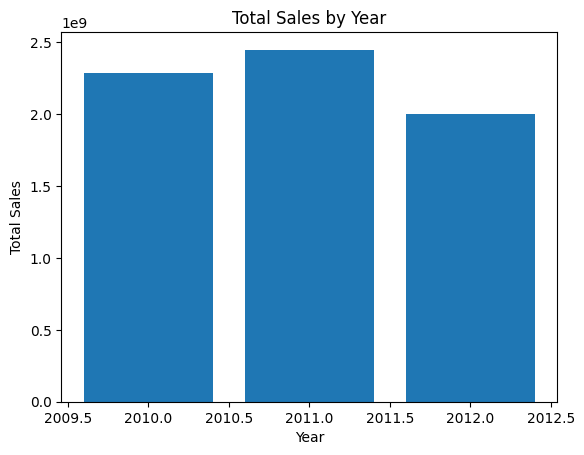

In [ ]:
# Comparison Analysis:
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum()
plt.bar(yearly_sales.index, yearly_sales.values)
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
# Hypothesis Testing:
import scipy.stats as stats

# Specify the years you want to compare
year_1 = 2010
year_2 = 2012

# Subset the sales data for the specified years
year_1_sales = data[data['Year'] == year_1]['Weekly_Sales']
year_2_sales = data[data['Year'] == year_2]['Weekly_Sales']

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(year_1_sales, year_2_sales)

# Print the results
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 1.480526465523845, p-value: 0.13880977150806437


In [ ]:
holiday_count = data[data['Holiday_Flag'] == 1].shape[0]
print("Holiday Count:", holiday_count)

Holiday Count: 450


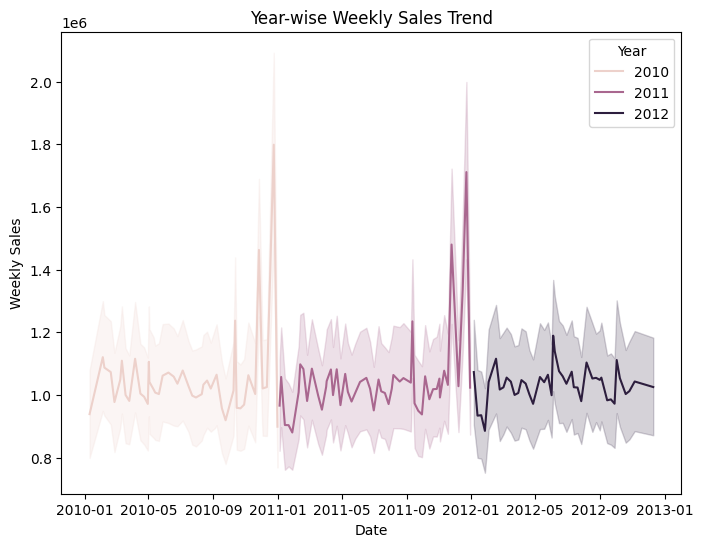

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x='Date', y='Weekly_Sales', hue='Year')
plt.title('Year-wise Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


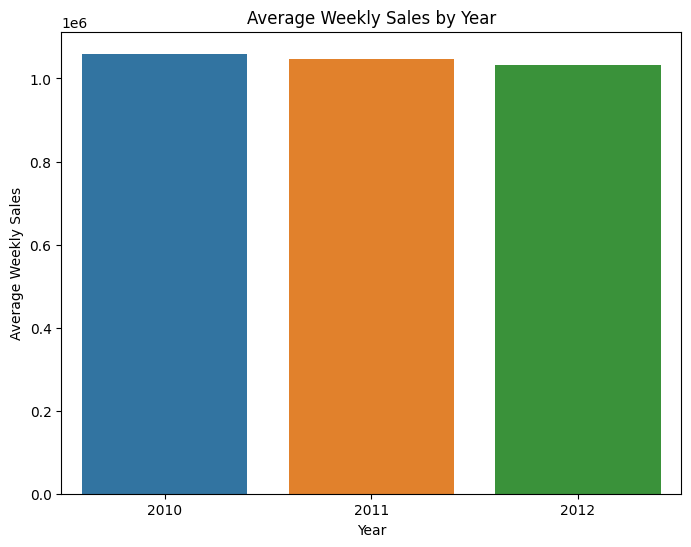

In [ ]:
# Bar plot for average Weekly Sales by year
avg_sales = data.groupby('Year')['Weekly_Sales'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales.index, y=avg_sales.values)
plt.title('Average Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.show()


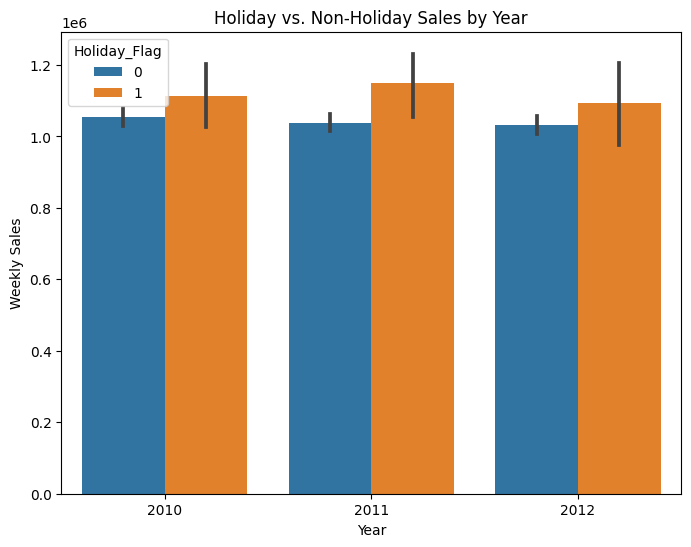

In [ ]:
# Bar plot for Holiday vs. Non-Holiday Sales by year:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Year', y='Weekly_Sales', hue='Holiday_Flag')
plt.title('Holiday vs. Non-Holiday Sales by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.show()

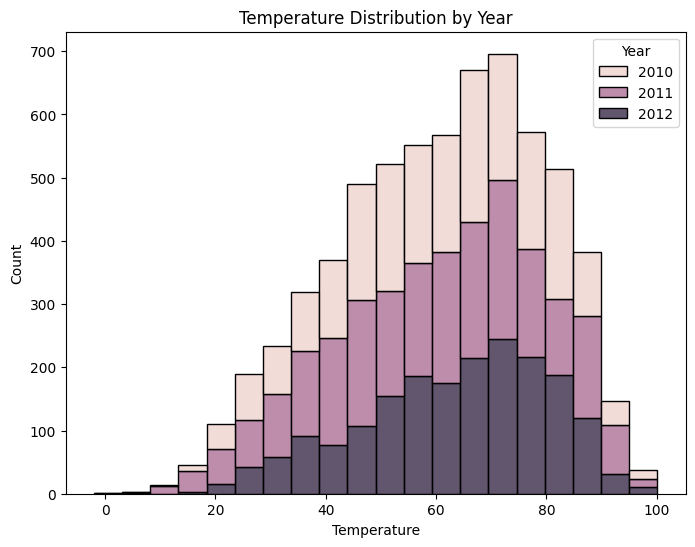

In [ ]:
# Histogram of Temperature distribution by year:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Temperature', hue='Year', bins=20, multiple='stack')
plt.title('Temperature Distribution by Year')
plt.xlabel('Temperature')
plt.show()


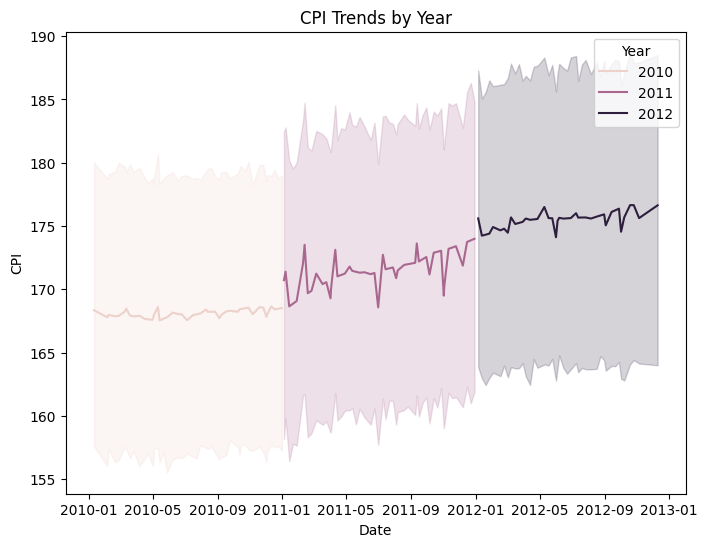

In [ ]:
# Line plot for CPI trends by year:
plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x='Date', y='CPI', hue='Year')
plt.title('CPI Trends by Year')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()


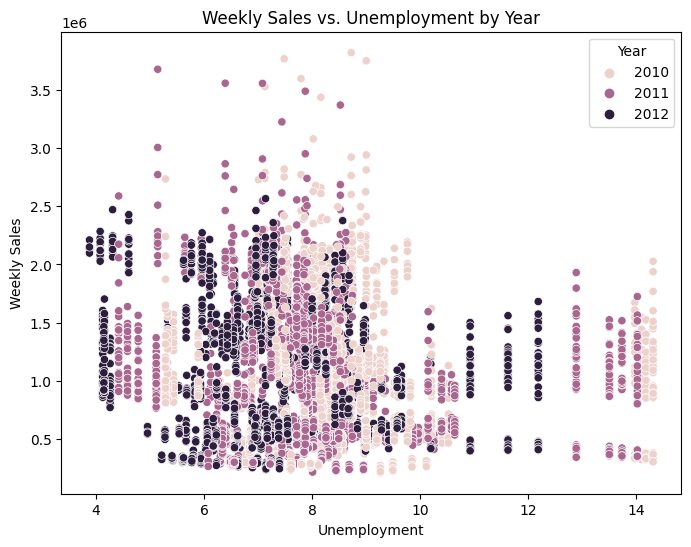

In [ ]:
# Scatter plot for Unemployment vs. Weekly Sales by year:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Unemployment', y='Weekly_Sales', hue='Year')
plt.title('Weekly Sales vs. Unemployment by Year')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()


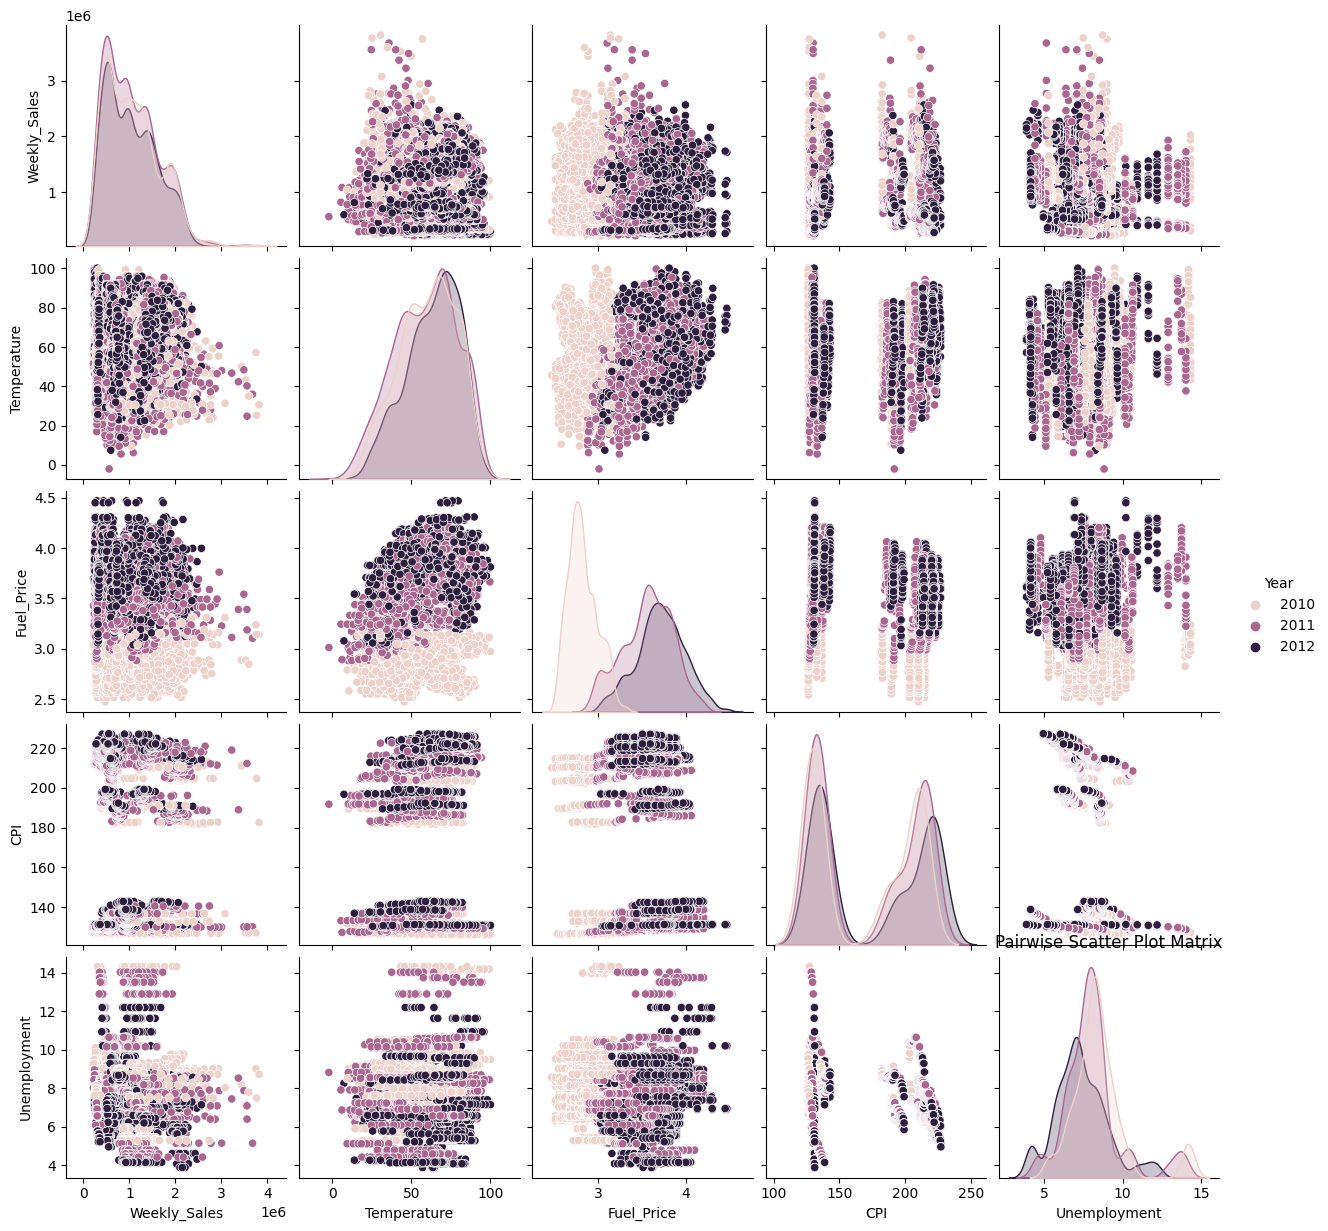

In [ ]:
# Pairwise scatter plot matrix for selected variables by year:
variables = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
sns.pairplot(data=data, vars=variables, hue='Year')
plt.title('Pairwise Scatter Plot Matrix')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Read the data into a DataFrame
df = pd.read_csv('/content/Walmart.csv')

# Create a line chart for Weekly Sales over time
sales_chart = px.line(df, x='Date', y='Weekly_Sales', color='Store', title='Weekly Sales')

# Create a bar chart for Holiday Flag
holiday_chart = px.bar(df, x='Store', y='Weekly_Sales', color='Holiday_Flag', title='Holiday Sales')

# Create a scatter plot for Temperature vs. Fuel Price
scatter_chart = px.scatter(df, x='Temperature', y='Fuel_Price', color='Store', title='Temperature vs. Fuel Price')

# Create a line chart for CPI trends
cpi_chart = px.line(df, x='Date', y='CPI', color='Store', title='CPI Trends')

# Create a bar chart for Unemployment
unemployment_chart = px.bar(df, x='Store', y='Unemployment', title='Unemployment')

# Create the dashboard layout
dashboard = go.Figure()
dashboard.add_trace(sales_chart.data[0])
dashboard.add_trace(holiday_chart.data[0])
dashboard.add_trace(scatter_chart.data[0])
dashboard.add_trace(cpi_chart.data[0])
dashboard.add_trace(unemployment_chart.data[0])

# Update the layout
dashboard.update_layout(
    title='Dashboard',
    height=600,
    width=800,
    template='plotly_dark'
)

# Show the dashboard
dashboard.show()


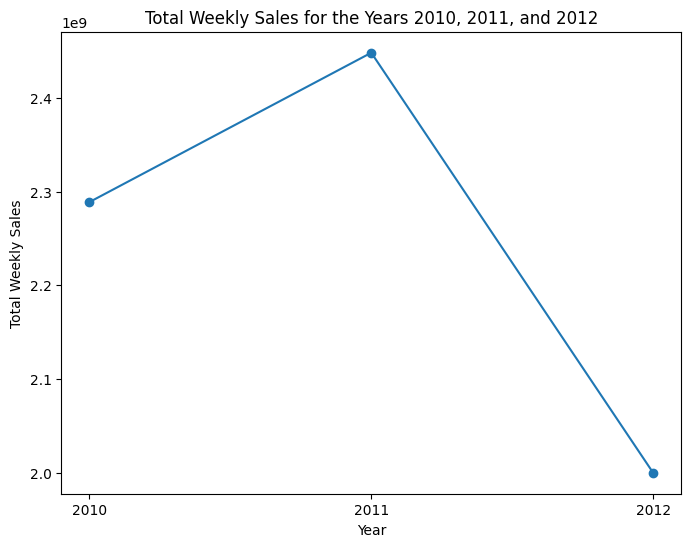

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for the years 2010, 2011, and 2012
filtered_data = data[data['Year'].isin([2010, 2011, 2012])]

# Group the filtered data by Year and calculate the total weekly sales
yearly_sales = filtered_data.groupby('Year')['Weekly_Sales'].sum()

plt.figure(figsize=(8, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')

plt.title('Total Weekly Sales for the Years 2010, 2011, and 2012')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.xticks(yearly_sales.index)

plt.show()


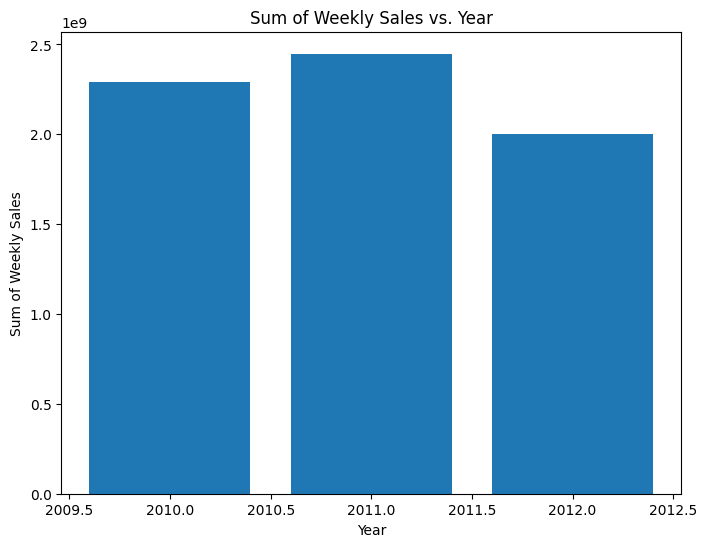

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Group the data by Year and calculate the sum of weekly sales
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum()

plt.figure(figsize=(8, 6))
plt.bar(yearly_sales.index, yearly_sales.values)

plt.title('Sum of Weekly Sales vs. Year')
plt.xlabel('Year')
plt.ylabel('Sum of Weekly Sales')

plt.show()


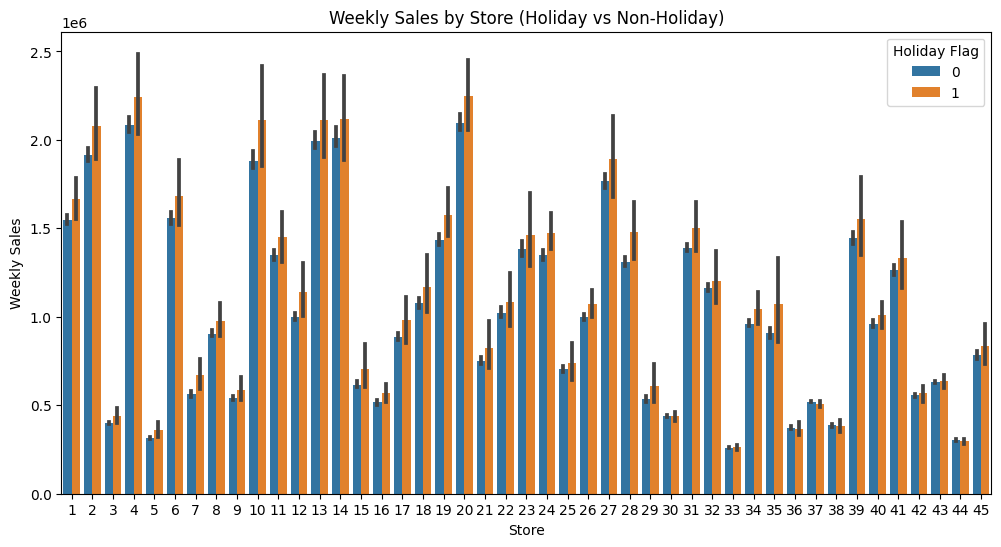

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Store', y='Weekly_Sales', hue='Holiday_Flag')

plt.title('Weekly Sales by Store (Holiday vs Non-Holiday)')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.legend(title='Holiday Flag')

plt.show()


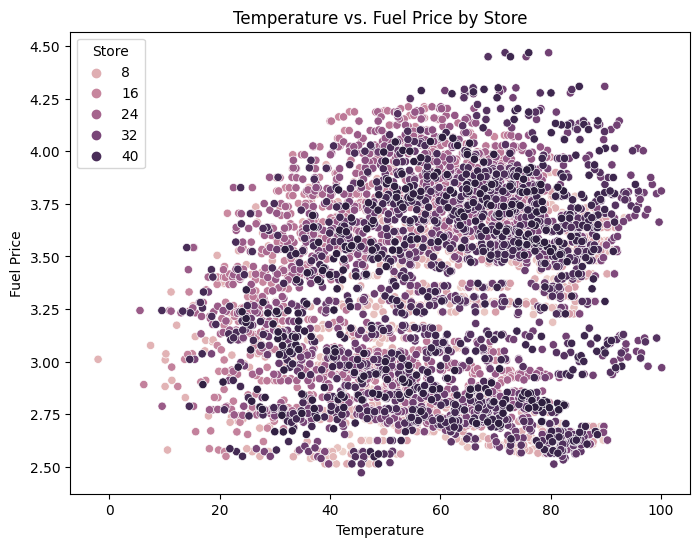

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Temperature', y='Fuel_Price', hue='Store')

plt.title('Temperature vs. Fuel Price by Store')
plt.xlabel('Temperature')
plt.ylabel('Fuel Price')

plt.show()


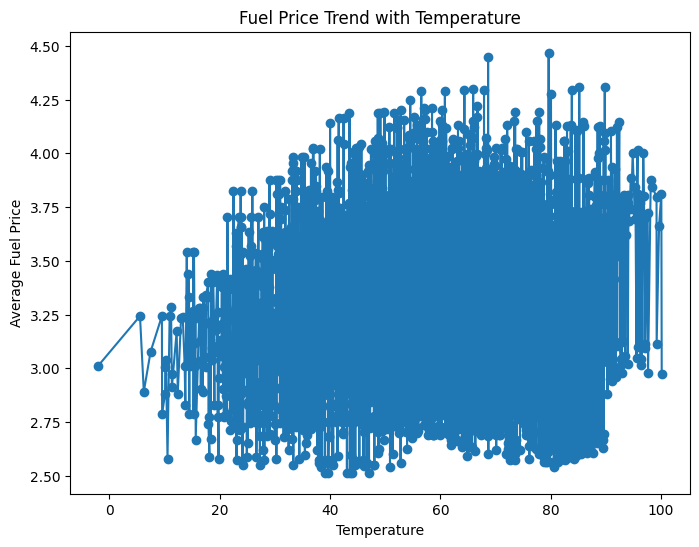

In [ ]:
import matplotlib.pyplot as plt

# Group the data by Store and calculate the average Fuel Price for each Temperature
avg_fuel_price = data.groupby('Temperature')['Fuel_Price'].mean()

plt.figure(figsize=(8, 6))
plt.plot(avg_fuel_price.index, avg_fuel_price.values, marker='o')

plt.title('Fuel Price Trend with Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Fuel Price')

plt.show()

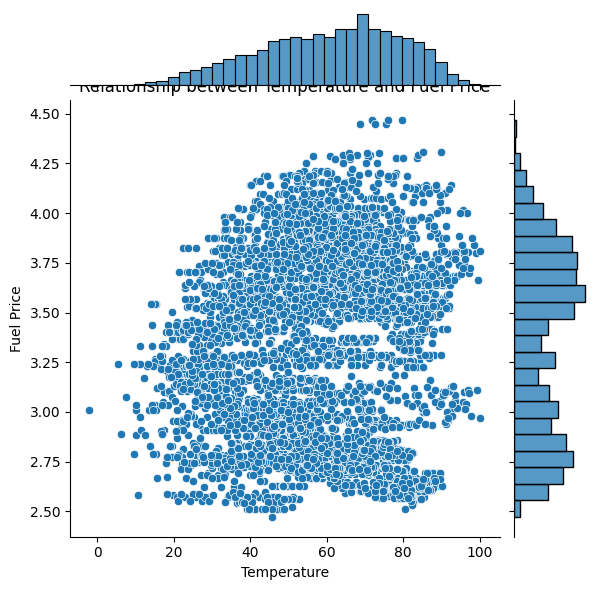

In [ ]:
import seaborn as sns

sns.jointplot(data=data, x='Temperature', y='Fuel_Price', kind='scatter')

plt.title('Relationship between Temperature and Fuel Price')
plt.xlabel('Temperature')
plt.ylabel('Fuel Price')

plt.show()

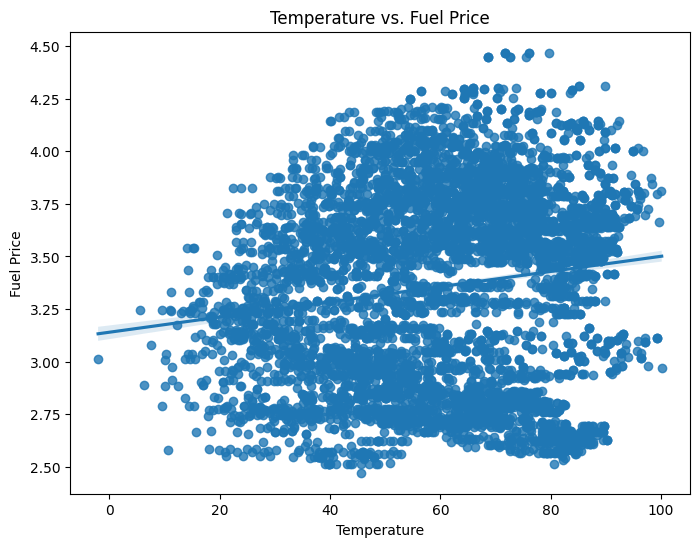

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='Temperature', y='Fuel_Price')
plt.title('Temperature vs. Fuel Price')
plt.xlabel('Temperature')
plt.ylabel('Fuel Price')
plt.show()


In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year

<ipython-input-21-410664ccc3da>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-21-410664ccc3da>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [ ]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

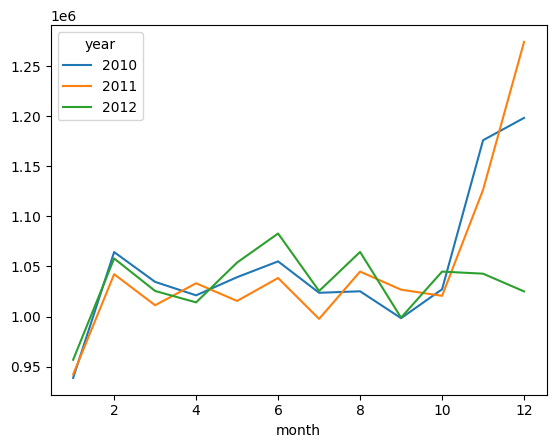

In [ ]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

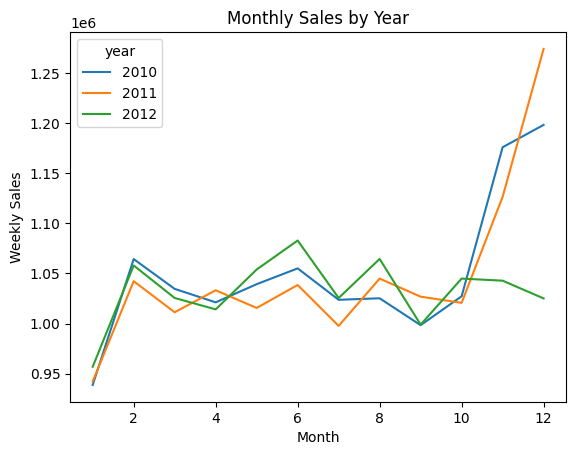

In [ ]:
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month")
monthly_sales.plot()

plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Monthly Sales by Year')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create a pivot table to aggregate sales by month and year
monthly_sales = df.pivot_table(values='Weekly_Sales', index='Month', columns='Year', aggfunc='sum')

# Plot the data using a line plot
monthly_sales.plot(kind='line', figsize=(8, 6))

plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales by Year')

plt.legend(title='Year')
plt.show()


KeyError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Create a pivot table to aggregate sales by month and year
monthly_sales = df.pivot_table(values='Weekly_Sales', index='Month', columns='Year', aggfunc='sum')

# Plot the data using a line plot
monthly_sales.plot(kind='line', figsize=(8, 6))

plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales by Year')

plt.legend(title='Year')
plt.show()


KeyError: ignored

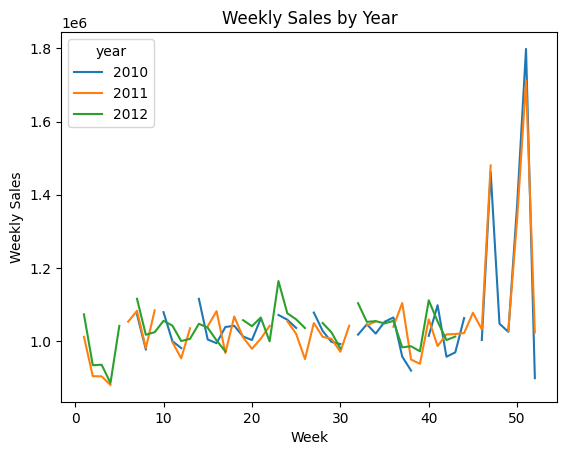

In [ ]:
weekly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="week")
weekly_sales.plot()

plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Year')

plt.show()
